In [12]:
%reload_ext autoreload
%autoreload 2

import tensorly as tl
import tensorly.random as tl_rand
import tensorly.base as tl_base
import tensorly.kruskal_tensor as tl_kruskal
import numpy as np

from cpd_mwu import CPD_MWU

In [13]:
# Set up
X = tl_rand.random_kruskal((366,366,100), 5, full=True)
sketching_rates = list(np.linspace(10**(-2), 10**(0), 4)) + [1]
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
nu = 2
rank = 5  
num_iterations = 200

In [14]:
# Run experiment
A,B,C, error, diff_norm = CPD_MWU(X, sketching_rates, lamb, eps, nu, rank, num_iterations)

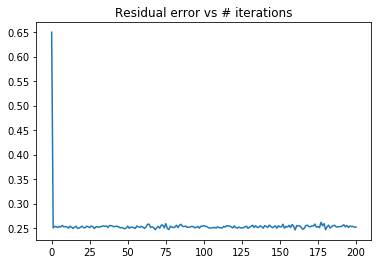

In [15]:
import matplotlib.pyplot as plt
x = [i for i in range(len(error))]
plt.title('Residual error vs # iterations')
plt.plot(x, error)